<a href="https://colab.research.google.com/github/deepika-rana/Classifying-Fashion-MNIST/blob/master/Classifying_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Building a neural network to classify the fashion items using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.



In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-03-14 06:52:56--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-03-14 06:52:56 (34.5 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


Here is one of the images.

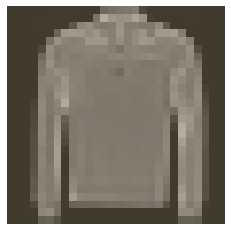

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. Used ReLU activations for the layers and to return the logits or log-softmax from the forward pass.

In [0]:
#Network Architecture
from torch import nn,optim
import torch.nn.functional as F
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.softmax=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(x.shape[0],-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.log_softmax(self.softmax(x),dim=1)

    return x



# Training the network


In [0]:
model=Classifier()
criterion=nn.NLLLoss()
optimiser=optim.Adam(model.parameters(),lr=0.003)

In [6]:
epochs=10

for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    logps=model(images)
    loss=criterion(logps,labels)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    running_loss+=loss.item()
  else:
      print(f"Training loss : {running_loss}")

Training loss : 478.8891865313053
Training loss : 366.18348637223244
Training loss : 330.2085855230689
Training loss : 310.3448399826884
Training loss : 298.5839106440544
Training loss : 284.8267418220639
Training loss : 272.5227009803057
Training loss : 268.20962988585234
Training loss : 256.544966571033
Training loss : 250.17184580862522


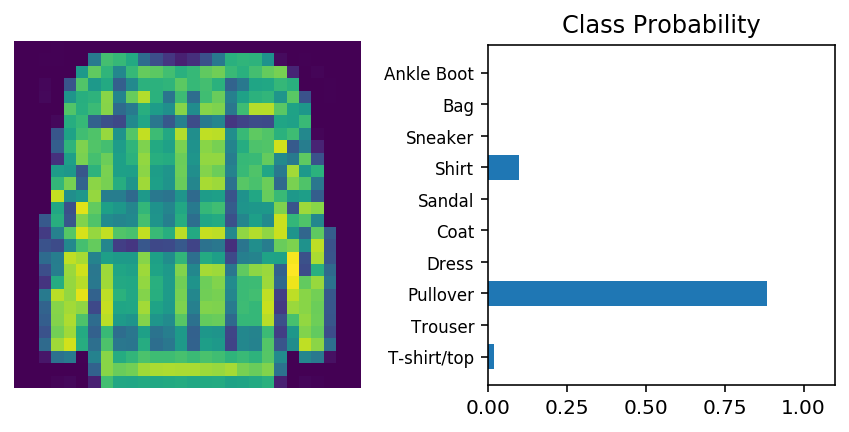

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

ps = torch.exp(model(img))

helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')